# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('new_data_set.xlsx')
df.head()

,pid,facilityid,examinationdate,age,sex,ee_zn_myasthener_exazerbation,zn_myasthener_krise,age_erst,age_diag,time_erst_to_diag,...,japan_classification,ee_postinterventionstatus_rb,eomg_lomg_45,eomg_lomg_50,thymom,adl_pass,qmg_pass,qol_pass,ee_auswahlbildungsabschluss_rb,schwerbehinderung
0,00QM6V52,2019009,2023-01-31 00:00:00,34.961111,0,0.0,1,17.583333,17.750000,0.166667,...,1.0,5.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,2.0
1,06U8DLMD,2019006,2023-01-31 00:00:00,59.711111,1,0.0,0,55.750000,58.916667,3.166667,...,4.0,6.0,1.0,1.0,0.0,NaN,1.0,NaN,1.0,0.0
2,0D31R9UX,2019010,2023-07-19 00:00:00,83.344444,1,1.0,0,80.666667,80.916667,0.250000,...,4.0,7.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0
3,0DAJN5Y2,2019019,2023-01-17 00:00:00,56.505556,1,0.0,0,56.166667,56.250000,0.083333,...,4.0,6.0,1.0,1.0,0.0,NaN,1.0,NaN,0.0,0.0
4,0G1WYG21,2019004,2020-12-10 00:00:00,39.986111,0,NaN,0,21.083333,21.083333,0.000000,...,4.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,2.0,0.0


In [3]:
missingess_per_var = (df.isna().sum() / df.shape[0])*100
cutoff_missingess_perc = 35
varKeep = missingess_per_var[missingess_per_var <= cutoff_missingess_perc].index

print(f"Keeping {len(varKeep)}/{df.shape[1]} variables")

data_clean = df.loc[:,varKeep]

print(f"\n\nDiscarded: {missingess_per_var[missingess_per_var > cutoff_missingess_perc].index.tolist()}")

Keeping 61/67 variables


Discarded: ['dekrement_testergebnis', 'testergebnis_cholinesterasehemmer', 'ee_histologie_sprb', 'scoreqmg_neu', 'ee_postinterventionstatus_rb', 'qmg_pass']


In [4]:
columns_to_check= ['dekrement_testergebnis', 'testergebnis_cholinesterasehemmer', 'ee_histologie_sprb', 'scoreqmg_neu', 'ee_postinterventionstatus_rb', 'qmg_pass']
missing_percentage = df[columns_to_check].isnull().mean() * 100
missing_percentage

dekrement_testergebnis               46.171070
testergebnis_cholinesterasehemmer    37.080161
ee_histologie_sprb                   61.352441
scoreqmg_neu                         60.188088
ee_postinterventionstatus_rb         73.085535
qmg_pass                             60.188088
dtype: float64

In [5]:
data_clean.head()

,pid,facilityid,examinationdate,age,sex,ee_zn_myasthener_exazerbation,zn_myasthener_krise,age_erst,age_diag,time_erst_to_diag,...,scoreqol_neu,scoreadl_neu,japan_classification,eomg_lomg_45,eomg_lomg_50,thymom,adl_pass,qol_pass,ee_auswahlbildungsabschluss_rb,schwerbehinderung
0,00QM6V52,2019009,2023-01-31 00:00:00,34.961111,0,0.0,1,17.583333,17.750000,0.166667,...,NaN,2.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,2.0
1,06U8DLMD,2019006,2023-01-31 00:00:00,59.711111,1,0.0,0,55.750000,58.916667,3.166667,...,NaN,NaN,4.0,1.0,1.0,0.0,NaN,NaN,1.0,0.0
2,0D31R9UX,2019010,2023-07-19 00:00:00,83.344444,1,1.0,0,80.666667,80.916667,0.250000,...,7.0,3.0,4.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0
3,0DAJN5Y2,2019019,2023-01-17 00:00:00,56.505556,1,0.0,0,56.166667,56.250000,0.083333,...,NaN,NaN,4.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0
4,0G1WYG21,2019004,2020-12-10 00:00:00,39.986111,0,NaN,0,21.083333,21.083333,0.000000,...,10.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0


In [6]:
df_original= data_clean.drop(['pid', 'examinationdate'], axis=1)
df_original.head()

,facilityid,age,sex,ee_zn_myasthener_exazerbation,zn_myasthener_krise,age_erst,age_diag,time_erst_to_diag,dauer,mgfaklassifikation_schlimmste_historisch,...,scoreqol_neu,scoreadl_neu,japan_classification,eomg_lomg_45,eomg_lomg_50,thymom,adl_pass,qol_pass,ee_auswahlbildungsabschluss_rb,schwerbehinderung
0,2019009,34.961111,0,0.0,1,17.583333,17.750000,0.166667,17.377778,8.0,...,NaN,2.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,2.0
1,2019006,59.711111,1,0.0,0,55.750000,58.916667,3.166667,3.961111,2.0,...,NaN,NaN,4.0,1.0,1.0,0.0,NaN,NaN,1.0,0.0
2,2019010,83.344444,1,1.0,0,80.666667,80.916667,0.250000,2.677778,5.0,...,7.0,3.0,4.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0
3,2019019,56.505556,1,0.0,0,56.166667,56.250000,0.083333,0.338889,2.0,...,NaN,NaN,4.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0
4,2019004,39.986111,0,NaN,0,21.083333,21.083333,0.000000,18.902778,5.0,...,10.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0


In [7]:
corr_columns= ['sex', 'age', 'time_erst_to_diag', 'scoreadl_neu', 'ee_zn_myasthener_exazerbation', 'zn_myasthener_krise', 'mgfaklassifikation_schlimmste_historisch', 'ee_autoimmunerkrankungen_rbzu', 
               'okulaer', 'bulbaer', 'ee_generalisiertemuskelschwaeche_rbzu', 'muskelschmerz', 'titinak', 'seronegative', 'ee_immuntherapie_grrb', 'ee_pyridostigmin_sprb',
                'ee_kortison_sprb', 'ee_azathioprin_sprb', 'ee_methotrexatfolsauure_sprb', 'ee_mycophenolatmofetil_sprb', 'ee_ciclosporin_sprb', 'pyridostigmin_aktuell',   
                'kortison_aktuell', 'azathioprin_aktuell', 'methotrexatfolsauure_aktuell', 'mycophenolatmofetil_aktuell', 'ee_eskalationstherapiebeitherapierefraktaerermyasthenie_grrb',
                'ee_eculizumab_sprb', 'ee_rituximab_sprb', 'ee_efgartigimod_sprb', 'ee_ravulizumab_sprb', 'ee_cyclophosphamid_sprb', 'eculizumab_aktuell', 'rituximab_aktuell', 'efgartigimod_aktuell',
                'ravulizumab_aktuell', 'ee_exazerbationstherapie_grrb', 'ee_plasmapherese_sprb', 'ee_immunadsorption_sprb', 'ee_ivig_sprb', 'japan_classification', 'eomg_lomg_45',
                'eomg_lomg_50', 'thymom', 'adl_pass', 'qol_pass', 'schwerbehinderung']

df_corr= df_original[corr_columns]
df_corr.head()

,sex,age,time_erst_to_diag,scoreadl_neu,ee_zn_myasthener_exazerbation,zn_myasthener_krise,mgfaklassifikation_schlimmste_historisch,ee_autoimmunerkrankungen_rbzu,okulaer,bulbaer,...,ee_plasmapherese_sprb,ee_immunadsorption_sprb,ee_ivig_sprb,japan_classification,eomg_lomg_45,eomg_lomg_50,thymom,adl_pass,qol_pass,schwerbehinderung
0,0,34.961111,0.166667,2.0,0.0,1,8.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,2.0
1,1,59.711111,3.166667,NaN,0.0,0,2.0,NaN,1.0,1.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,NaN,NaN,0.0
2,1,83.344444,0.250000,3.0,1.0,0,5.0,1.0,1.0,1.0,...,0.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
3,1,56.505556,0.083333,NaN,0.0,0,2.0,NaN,1.0,1.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,NaN,NaN,0.0
4,0,39.986111,0.000000,1.0,NaN,0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Get the list of variables in df_original and df_corr
original_vars = set(df_original.columns)
corr_vars = set(df_corr.columns)

# Find the variables that were excluded
excluded_vars = list(original_vars - corr_vars)

# Count variables
num_kept = len(corr_vars)
num_original = len(original_vars)

# Print the summary
print(f"Keeping {num_kept}/{num_original} variables")
print("\nDiscarded:", excluded_vars)

Keeping 47/59 variables

Discarded: ['aktueller_mgfa_score', 'MGFA_umkodiert_betonung', 'ee_auswahlbildungsabschluss_rb', 'chronicfatigue_neu', 'mgfa_aktuell_1bis5', 'ee_thymektomie_gr', 'age_erst', 'dauer', 'age_diag', 'scoreqol_neu', 'facilityid', 'mgfaklassifikation_schlimmste_historisch_1bis5']


# Handling Missing Values: MICE Imputation (Decision Tree Regressor)

In [9]:
# Define the columns
continuous_columns = ['age', 'time_erst_to_diag', 'scoreadl_neu']

categorical_columns = ['sex', 'ee_zn_myasthener_exazerbation', 'zn_myasthener_krise', 'mgfaklassifikation_schlimmste_historisch', 'ee_autoimmunerkrankungen_rbzu', 
               'okulaer', 'bulbaer', 'ee_generalisiertemuskelschwaeche_rbzu', 'muskelschmerz', 'titinak', 'seronegative', 'ee_immuntherapie_grrb', 'ee_pyridostigmin_sprb',
                'ee_kortison_sprb', 'ee_azathioprin_sprb', 'ee_methotrexatfolsauure_sprb', 'ee_mycophenolatmofetil_sprb', 'ee_ciclosporin_sprb', 'pyridostigmin_aktuell',   
                'kortison_aktuell', 'azathioprin_aktuell', 'methotrexatfolsauure_aktuell', 'mycophenolatmofetil_aktuell', 'ee_eskalationstherapiebeitherapierefraktaerermyasthenie_grrb',
                'ee_eculizumab_sprb', 'ee_rituximab_sprb', 'ee_efgartigimod_sprb', 'ee_ravulizumab_sprb', 'ee_cyclophosphamid_sprb', 'eculizumab_aktuell', 'rituximab_aktuell', 'efgartigimod_aktuell',
                'ravulizumab_aktuell', 'ee_exazerbationstherapie_grrb', 'ee_plasmapherese_sprb', 'ee_immunadsorption_sprb', 'ee_ivig_sprb', 'japan_classification', 'eomg_lomg_45',
                'eomg_lomg_50', 'thymom', 'adl_pass', 'qol_pass', 'schwerbehinderung']

# Custom function for rounding categorical variables
def round_categorical(imputed_data, categorical_columns):
    imputed_data[categorical_columns] = imputed_data[categorical_columns].round().astype(int)
    return imputed_data

# Custom function to enforce non-negative values on continuous columns
def enforce_non_negative(df, continuous_columns):
    df[continuous_columns] = df[continuous_columns].applymap(lambda x: max(x, 0))
    return df

In [10]:
# Tune DecisionTreeRegressor
dt_estimator = DecisionTreeRegressor(max_depth=20,        
                                     min_samples_split=5, 
                                     min_samples_leaf=3,  
                                     random_state=0)

# Initialize the MICE imputer with tuned DecisionTreeRegressor
mice_imputer = IterativeImputer(estimator=dt_estimator, 
                                max_iter=30,  
                                random_state=0, 
                                tol=1e-4,  
                                n_nearest_features=10,
                                initial_strategy='median')

In [11]:
# Fit and transform the dataset
df_imputed = mice_imputer.fit_transform(df_corr)

# Convert the imputed result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_corr.columns)

# Apply rounding to categorical variables
df_imputed = round_categorical(df_imputed, categorical_columns)

# Enforce non-negative values on continuous columns
df_imputed = enforce_non_negative(df_imputed, continuous_columns)  

# Output the imputed dataset
df_imputed_dataset = df_imputed
df_imputed_dataset.head()

,sex,age,time_erst_to_diag,scoreadl_neu,ee_zn_myasthener_exazerbation,zn_myasthener_krise,mgfaklassifikation_schlimmste_historisch,ee_autoimmunerkrankungen_rbzu,okulaer,bulbaer,...,ee_plasmapherese_sprb,ee_immunadsorption_sprb,ee_ivig_sprb,japan_classification,eomg_lomg_45,eomg_lomg_50,thymom,adl_pass,qol_pass,schwerbehinderung
0,0,34.961111,0.166667,2.00,0,1,8,0,0,1,...,0,0,1,1,0,0,0,1,1,2
1,1,59.711111,3.166667,0.25,0,0,2,0,1,1,...,0,0,0,4,1,1,0,1,1,0
2,1,83.344444,0.250000,3.00,1,0,5,1,1,1,...,0,0,1,4,1,1,0,0,1,2
3,1,56.505556,0.083333,5.25,0,0,2,0,1,1,...,0,0,0,4,1,1,0,0,0,0
4,0,39.986111,0.000000,1.00,0,0,5,1,1,0,...,0,0,0,4,0,0,0,1,0,0


# Clustering

In [12]:
var_clustering= ['sex', 'age', 'time_erst_to_diag', 'scoreadl_neu', 'ee_zn_myasthener_exazerbation', 'zn_myasthener_krise', 'mgfaklassifikation_schlimmste_historisch', 'ee_autoimmunerkrankungen_rbzu', 
               'okulaer', 'bulbaer', 'ee_generalisiertemuskelschwaeche_rbzu', 'muskelschmerz', 'titinak', 'seronegative', 'ee_immuntherapie_grrb', 'ee_pyridostigmin_sprb',
                'ee_kortison_sprb', 'ee_azathioprin_sprb', 'ee_methotrexatfolsauure_sprb', 'ee_mycophenolatmofetil_sprb', 'ee_ciclosporin_sprb', 'pyridostigmin_aktuell',   
                'kortison_aktuell', 'azathioprin_aktuell', 'methotrexatfolsauure_aktuell', 'mycophenolatmofetil_aktuell', 'ee_eskalationstherapiebeitherapierefraktaerermyasthenie_grrb',
                'ee_eculizumab_sprb', 'ee_rituximab_sprb', 'ee_efgartigimod_sprb', 'ee_ravulizumab_sprb', 'ee_cyclophosphamid_sprb', 'eculizumab_aktuell', 'rituximab_aktuell', 'efgartigimod_aktuell',
                'ravulizumab_aktuell', 'ee_exazerbationstherapie_grrb', 'ee_plasmapherese_sprb', 'ee_immunadsorption_sprb', 'ee_ivig_sprb', 'japan_classification', 'eomg_lomg_45',
                'eomg_lomg_50', 'thymom', 'adl_pass', 'qol_pass', 'schwerbehinderung']

df_clustering= df_imputed_dataset[var_clustering]
df_clustering.head()

,sex,age,time_erst_to_diag,scoreadl_neu,ee_zn_myasthener_exazerbation,zn_myasthener_krise,mgfaklassifikation_schlimmste_historisch,ee_autoimmunerkrankungen_rbzu,okulaer,bulbaer,...,ee_plasmapherese_sprb,ee_immunadsorption_sprb,ee_ivig_sprb,japan_classification,eomg_lomg_45,eomg_lomg_50,thymom,adl_pass,qol_pass,schwerbehinderung
0,0,34.961111,0.166667,2.00,0,1,8,0,0,1,...,0,0,1,1,0,0,0,1,1,2
1,1,59.711111,3.166667,0.25,0,0,2,0,1,1,...,0,0,0,4,1,1,0,1,1,0
2,1,83.344444,0.250000,3.00,1,0,5,1,1,1,...,0,0,1,4,1,1,0,0,1,2
3,1,56.505556,0.083333,5.25,0,0,2,0,1,1,...,0,0,0,4,1,1,0,0,0,0
4,0,39.986111,0.000000,1.00,0,0,5,1,1,0,...,0,0,0,4,0,0,0,1,0,0


# Scaling Continuous Variables

In [13]:
# Step 1: Scale the continuous columns
continuous_columns = ['age', 'time_erst_to_diag', 'scoreadl_neu']
scaler = MinMaxScaler()
df_clustering[continuous_columns] = scaler.fit_transform(df_clustering[continuous_columns])

# Step 2: Create the new category column
def define_category(row):
    if row['seronegative'] == 0 and row['sex'] == 0:
        return "SPF"  # Seropositive Female
    elif row['seronegative'] == 0 and row['sex'] == 1:
        return "SPM"  # Seropositive Male
    elif row['seronegative'] == 1 and row['sex'] == 0:
        return "SNF"  # Seronegative Female
    else:
        return "SNM"  # Seronegative Male

df_clustering['category'] = df_clustering.apply(define_category, axis=1)

# Step 3: Prepare data for clustering by excluding unnecessary columns
clustering_data = df_clustering.drop(columns=['sex', 'seronegative', 'category'])

In [14]:
# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data)
df_clustering['pca_1'], df_clustering['pca_2'] = pca_result[:, 0], pca_result[:, 1]

# Run tSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(clustering_data)
df_clustering['tsne_1'], df_clustering['tsne_2'] = tsne_result[:, 0], tsne_result[:, 1]

# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(clustering_data)
df_clustering['umap_1'], df_clustering['umap_2'] = umap_result[:, 0], umap_result[:, 1]

# Step 4: Visualize with color categories
color_palette = {
    'SPF': 'lightcoral',  # Seropositive Female (Red)
    'SPM': 'royalblue',   # Seropositive Male (Blue)
    'SNF': 'darkred',     # Seronegative Female (Dark Red)
    'SNM': 'darkblue'     # Seronegative Male (Dark Blue)
}

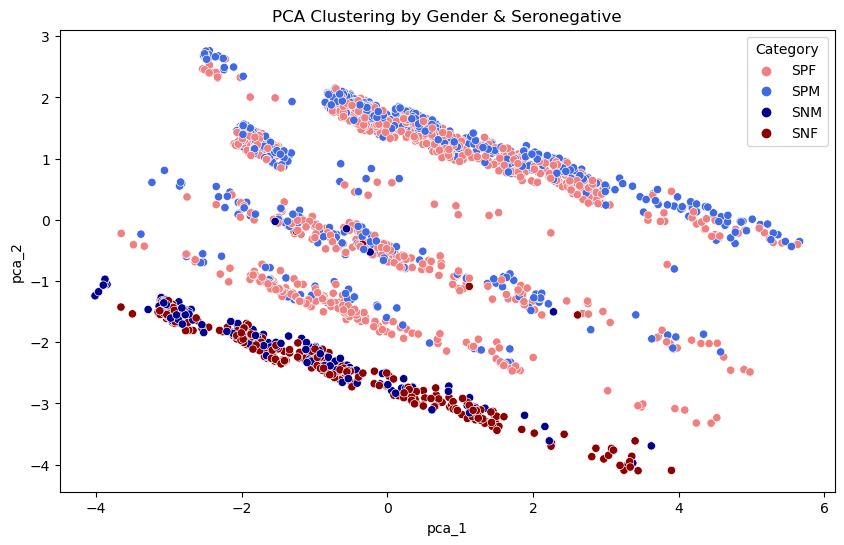

In [15]:
# Plotting PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='category', data=df_clustering, palette=color_palette)
plt.title('PCA Clustering by Gender & Seronegative')
plt.legend(title='Category')
plt.show()

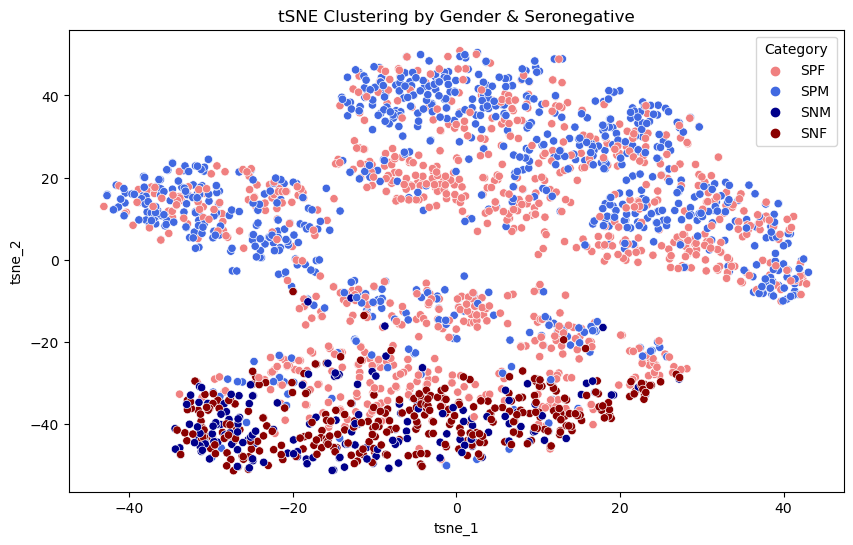

In [16]:
# Plotting tSNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='category', data=df_clustering, palette=color_palette)
plt.title('tSNE Clustering by Gender & Seronegative')
plt.legend(title='Category')
plt.show()

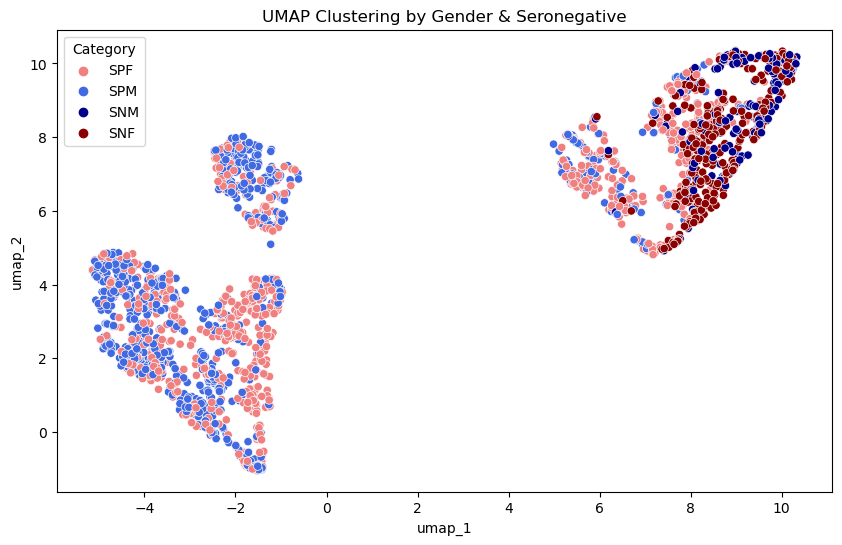

In [17]:
# Plotting UMAP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='umap_1', y='umap_2', hue='category', data=df_clustering, palette=color_palette)
plt.title('UMAP Clustering by Gender & Seronegative')
plt.legend(title='Category')
plt.show()

In [18]:
# Define columns
continuous_columns = ['age', 'time_erst_to_diag', 'scoreadl_neu']

categorical_columns1 = [
    'sex', 'ee_zn_myasthener_exazerbation', 'zn_myasthener_krise', 
    'mgfaklassifikation_schlimmste_historisch', 'ee_autoimmunerkrankungen_rbzu', 
    'okulaer', 'bulbaer', 'ee_generalisiertemuskelschwaeche_rbzu', 
    'muskelschmerz', 'titinak', 'seronegative', 'ee_immuntherapie_grrb', 
    'ee_pyridostigmin_sprb', 'ee_kortison_sprb', 'ee_azathioprin_sprb', 
    'ee_methotrexatfolsauure_sprb', 'ee_mycophenolatmofetil_sprb', 
    'ee_ciclosporin_sprb', 'pyridostigmin_aktuell', 'kortison_aktuell', 
    'azathioprin_aktuell', 'methotrexatfolsauure_aktuell', 
    'mycophenolatmofetil_aktuell', 'ee_eskalationstherapiebeitherapierefraktaerermyasthenie_grrb'
]

categorical_columns2 = [
    'ee_eculizumab_sprb', 'ee_rituximab_sprb', 'ee_efgartigimod_sprb', 
    'ee_ravulizumab_sprb', 'ee_cyclophosphamid_sprb', 'eculizumab_aktuell', 
    'rituximab_aktuell', 'efgartigimod_aktuell', 'ravulizumab_aktuell', 
    'ee_exazerbationstherapie_grrb', 'ee_plasmapherese_sprb', 
    'ee_immunadsorption_sprb', 'ee_ivig_sprb', 'japan_classification', 
    'eomg_lomg_45', 'eomg_lomg_50', 'thymom', 'adl_pass', 'qol_pass', 
    'schwerbehinderung']

In [19]:
# Function to perform PCA and plot variable influence
def perform_pca_and_plot(data, column_names, title_suffix):
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first') if len(column_names) > 3 else StandardScaler(), column_names)
        ]
    )
    
    # Transform data
    data_transformed = preprocessor.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_transformed)
    
    # Get PCA loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=[name.split('__')[1] if '__' in name else name for name in preprocessor.get_feature_names_out()]
    )
    
    # Plot
    loadings_abs = loadings.abs()
    loadings_sorted = loadings_abs.sort_values(by=['PC1', 'PC2'], ascending=False)
    
    print(f"PCA Loadings (Variable Influence on PC1 and PC2) - {title_suffix}:")
    print(loadings_sorted[['PC1', 'PC2']])
    
    plt.figure(figsize=(12, 8))
    loadings_sorted[['PC1', 'PC2']].plot(kind='bar', width=0.8, figsize=(18, 10))
    plt.title(f'Variable Influence on Principal Components ({title_suffix})', fontsize=16)
    plt.xlabel('Variables', fontsize=14)
    plt.ylabel('Influence', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(['PC1', 'PC2'], title='Principal Component', fontsize=12)
    plt.tight_layout()
    plt.show()

PCA Loadings (Variable Influence on PC1 and PC2) - Continuous Columns:
                        PC1       PC2
scoreadl_neu       0.675602  0.163311
time_erst_to_diag  0.652312  0.322043
age                0.343586  0.932533


<Figure size 1200x800 with 0 Axes>

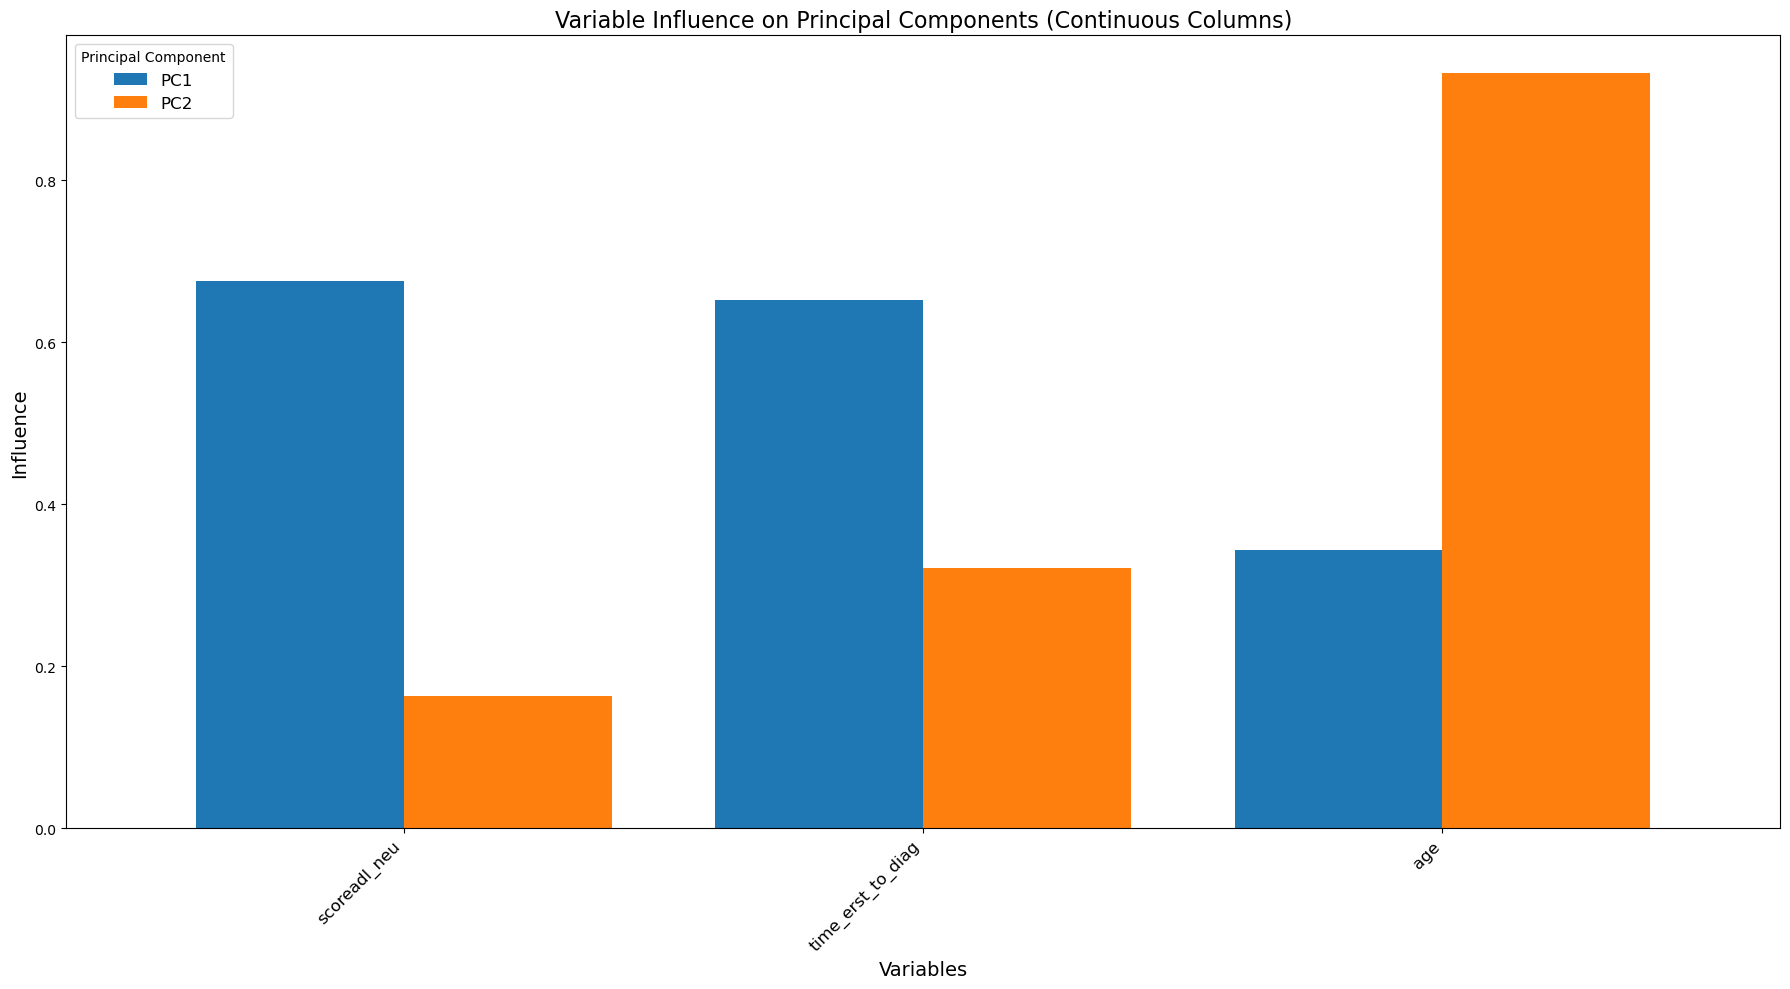

In [20]:
# Apply to continuous columns
perform_pca_and_plot(df_clustering, continuous_columns, "Continuous Columns")

PCA Loadings (Variable Influence on PC1 and PC2) - Categorical Columns Set 1:
                                                         PC1       PC2
ee_generalisiertemuskelschwaeche_rbzu_1             0.554485  0.053451
bulbaer_1                                           0.472711  0.301387
mgfaklassifikation_schlimmste_historisch_1          0.320433  0.177813
muskelschmerz_1                                     0.316420  0.016094
sex_1                                               0.239640  0.433414
ee_zn_myasthener_exazerbation_1                     0.205215  0.013808
mgfaklassifikation_schlimmste_historisch_5          0.171062  0.008792
ee_eskalationstherapiebeitherapierefraktaerermy...  0.161637  0.079714
ee_autoimmunerkrankungen_rbzu_1                     0.145865  0.240787
kortison_aktuell_1                                  0.134870  0.279988
ee_immuntherapie_grrb_1                             0.117613  0.126937
mycophenolatmofetil_aktuell_1                       0.113189  0.096190

<Figure size 1200x800 with 0 Axes>

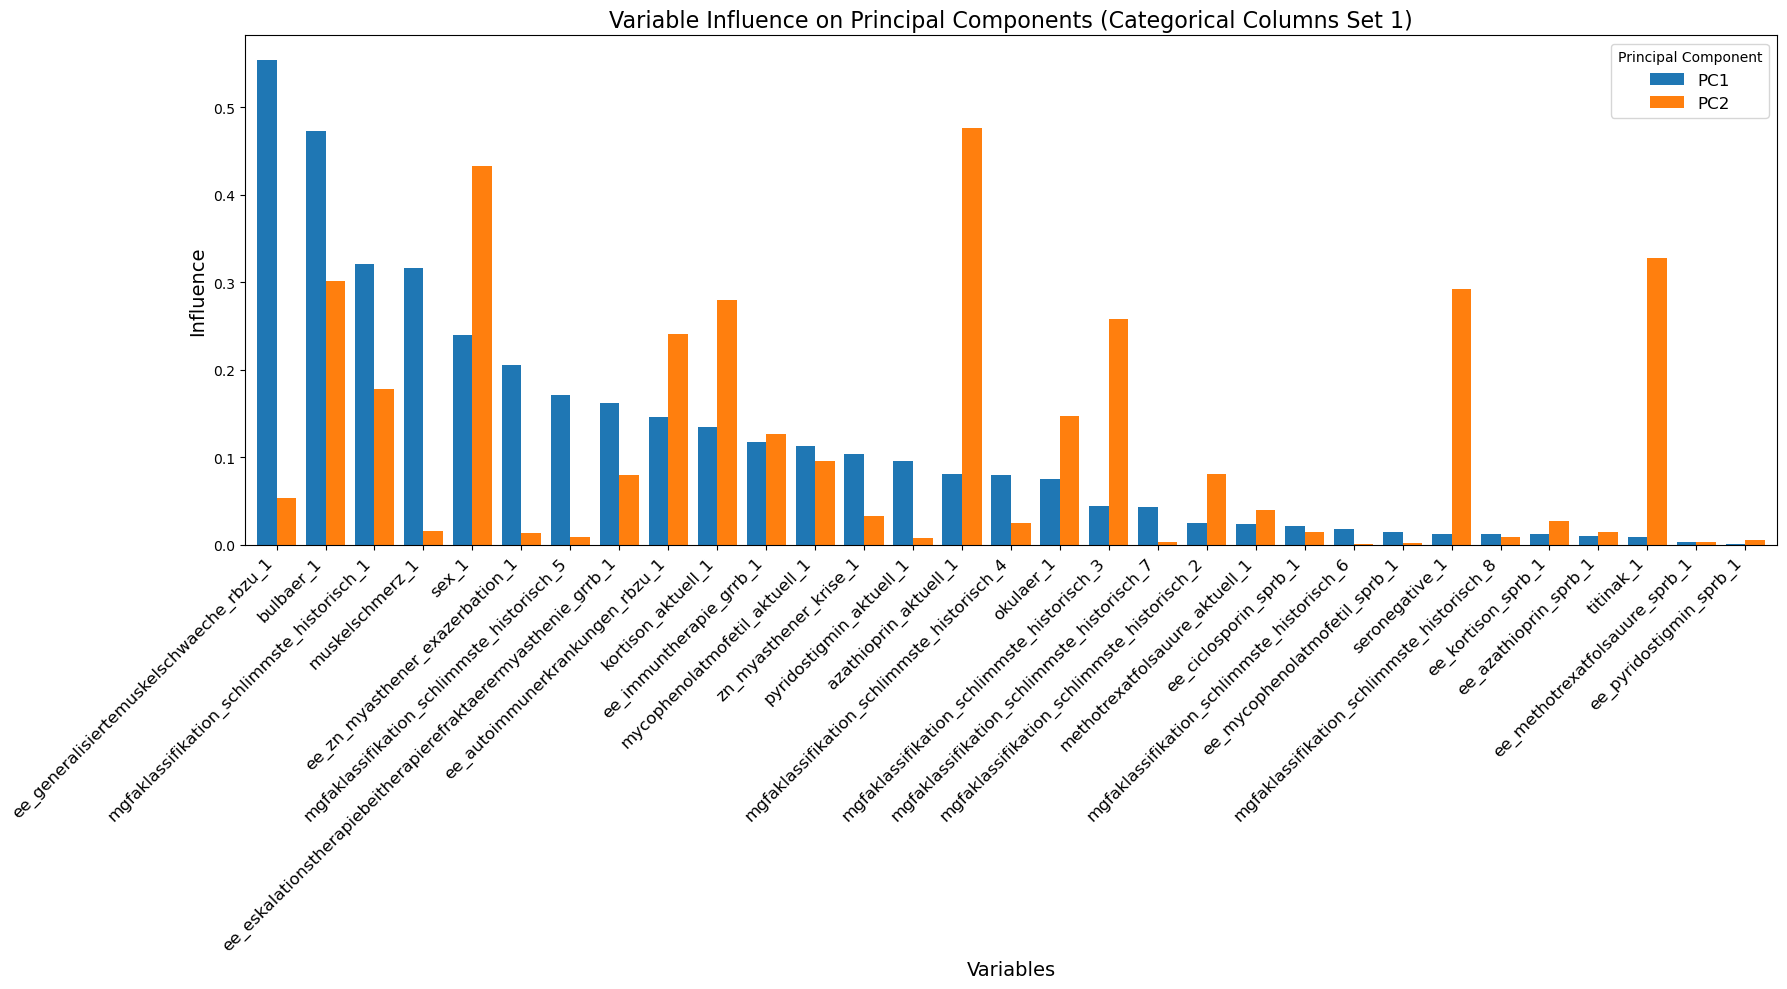

In [21]:
# Apply to categorical columns set 1
perform_pca_and_plot(df_clustering, categorical_columns1, "Categorical Columns Set 1")

PCA Loadings (Variable Influence on PC1 and PC2) - Categorical Columns Set 2:
                                      PC1       PC2
eomg_lomg_50_1                   0.643193  0.172414
eomg_lomg_45_1                   0.612571  0.169511
japan_classification_4           0.256112  0.283400
adl_pass_1                       0.192193  0.528676
qol_pass_1                       0.183022  0.555196
japan_classification_1           0.149741  0.081799
schwerbehinderung_2              0.142956  0.342899
ee_exazerbationstherapie_grrb_1  0.085185  0.250142
ee_ivig_sprb_1                   0.079391  0.217677
thymom_1                         0.070896  0.046806
japan_classification_2           0.070777  0.045543
japan_classification_3           0.065914  0.142022
rituximab_aktuell_1              0.037157  0.032604
ee_plasmapherese_sprb_1          0.035482  0.081786
ravulizumab_aktuell_1            0.028023  0.034365
ee_immunadsorption_sprb_1        0.017481  0.029603
efgartigimod_aktuell_1           0.015

<Figure size 1200x800 with 0 Axes>

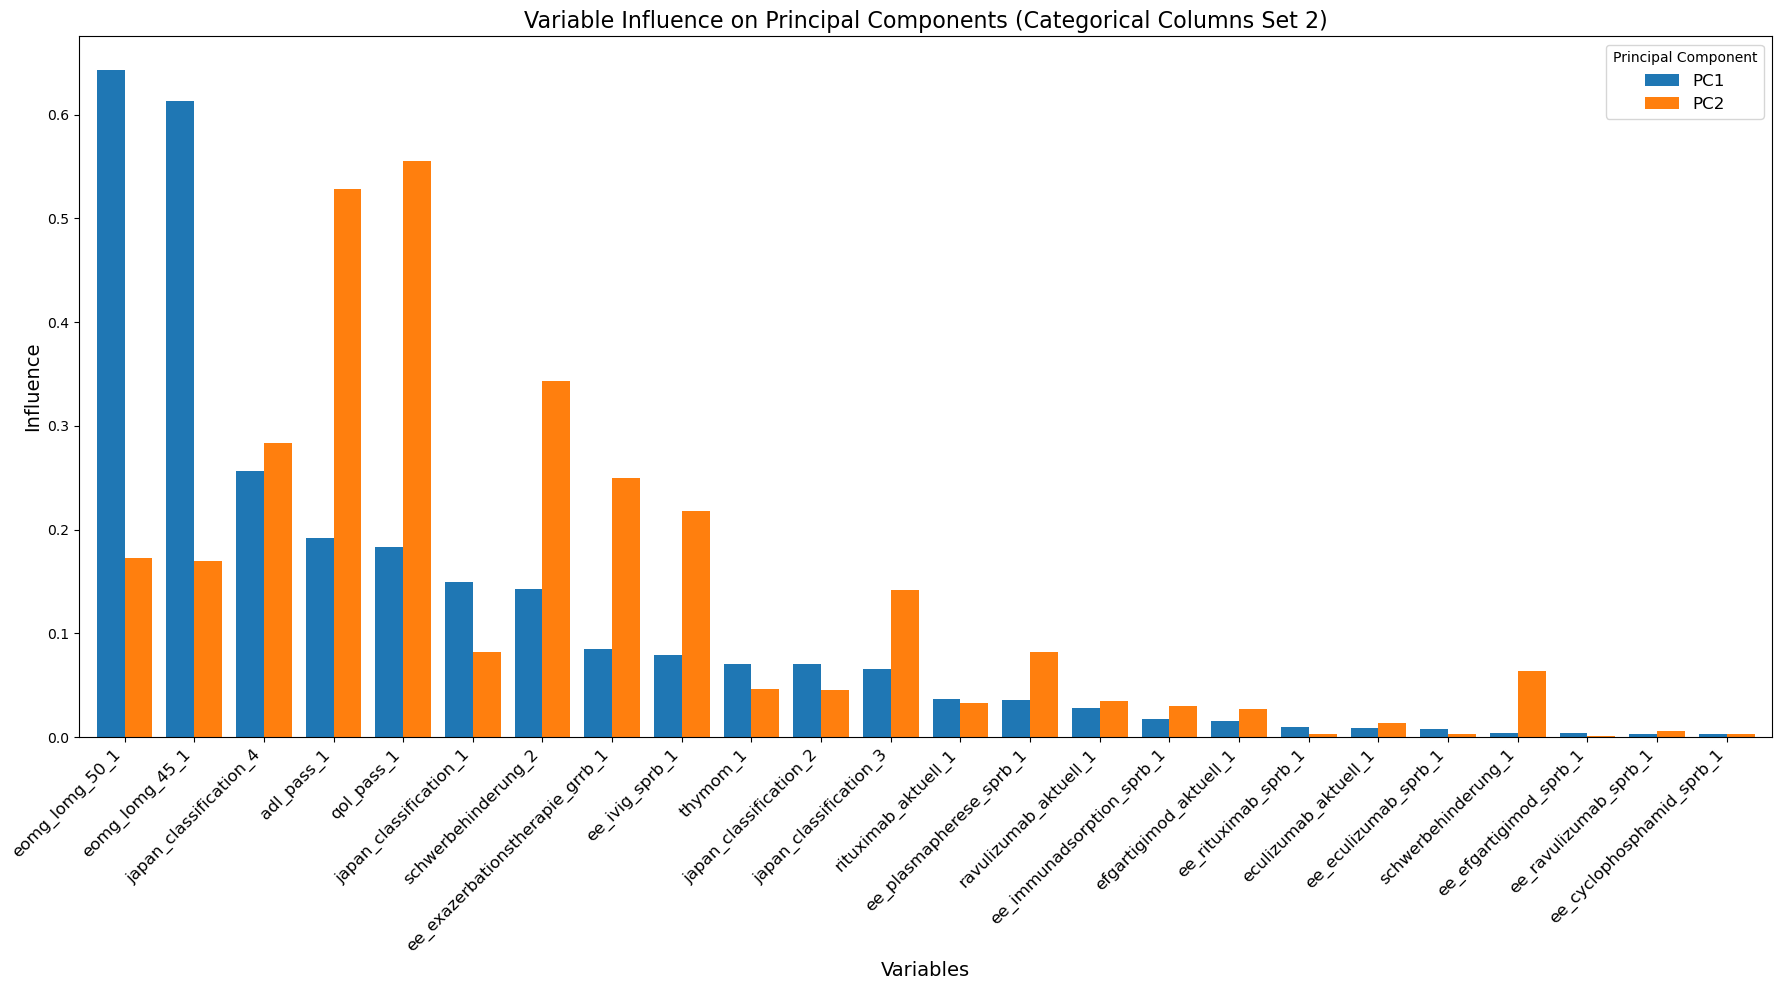

In [22]:
# Apply to categorical columns set 2
perform_pca_and_plot(df_clustering, categorical_columns2, "Categorical Columns Set 2")